# 1、import data

In [1]:
import scipy.io
import pandas as pd
import gzip

# 读取 matrix.mtx.gz
matrix_path = './GSE221536_RAW_2/GSM6883100_F_CO/matrix.mtx.gz'
matrix = scipy.io.mmread(matrix_path)

# 读取 features.tsv.gz 获取基因名称
features_path = './GSE221536_RAW_2/GSM6883100_F_CO/features.tsv.gz'
with gzip.open(features_path, 'rt') as f:
    genes = [line.strip().split('\t')[1] for line in f]

# 提取细胞名称
barcodes = [f"Cell_{i}" for i in range(matrix.shape[1])]  # 根据细胞数量自动生成细胞名称

# 将细胞名称写入新的 barcodes.tsv.gz 文件
output_barcodes_path = './GSE221536_RAW_2/GSM6883100_F_CO/barcodes.tsv.gz'
with gzip.open(output_barcodes_path, 'wt') as f:
    for barcode in barcodes:
        f.write(f"{barcode}\n")

print(f"细胞名称已写入 {output_barcodes_path} 文件中。")

细胞名称已写入 ./GSE221536_RAW_2/GSM6883100_F_CO/barcodes.tsv.gz 文件中。


In [1]:
import numpy as np
import pandas as pd
import os
import scanpy as sc

# List of file paths
file_paths_no_seizure = [
    './GSE221536_RAW_2/GSM6883091_A_CO_GRCh38',
    './GSE221536_RAW_2/GSM6883092_A_LE_GRCh38',
    './GSE221536_RAW_2/GSM6883093_B-CO_GRCh38', 
    './GSE221536_RAW_2/GSM6883094_B-LE_GRCh38', 
    './GSE221536_RAW_2/GSM6883095_C_CO_GRCh38',  
    './GSE221536_RAW_2/GSM6883096_C_LE_GRCh38',
]

file_paths_seizure = [
    './GSE221536_RAW_2/GSM6883097_D-CO_GRCh38',
    './GSE221536_RAW_2/GSM6883098_E_CO_GRCh38',
    './GSE221536_RAW_2/GSM6883099_E-LE_GRCh38', 
    './GSE221536_RAW_2/GSM6883100_F_CO',
    './GSE221536_RAW_2/GSM6883101_G_CO_GRCh38', 
    './GSE221536_RAW_2/GSM6883102_G_LE'
]

# Create an empty list to store individual AnnData objects for each condition
adata_list_no_seizure = []
adata_list_seizure = []

# Load data for no seizure condition
for path in file_paths_no_seizure:
    adata_sample = sc.read_10x_mtx(path, cache=True)
    adata_list_no_seizure.append(adata_sample)

# Load data for seizure condition
for path in file_paths_seizure:
    adata_sample = sc.read_10x_mtx(path, cache=True)
    adata_list_seizure.append(adata_sample)

# Concatenate the AnnData objects into a single AnnData object for each condition
adata_no_seizure = sc.concat(adata_list_no_seizure)
adata_seizure = sc.concat(adata_list_seizure)

# Add condition labels to obs
adata_no_seizure.obs['condition'] = 'no seizure'
adata_seizure.obs['condition'] = 'seizure'

# Concatenate the two conditions into a single AnnData object
adata = adata_no_seizure.concatenate(adata_seizure)

# Make observation names unique
adata.obs_names_make_unique()

adata.var_names_make_unique()

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1755: FutureWarning: The AnnData.concatenate method is deprecated in favour of the anndata.concat function. Please use anndata.concat instead.

See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  warnings.warn(
/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/anndata/_core/anndata.py:1830: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_dup

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/umap/distances.py:108

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.23.5 scipy==1.10.1 pandas==1.5.3 scikit-learn==1.3.0 statsmodels==0.14.0 python-igraph==0.10.6 pynndescent==0.5.10


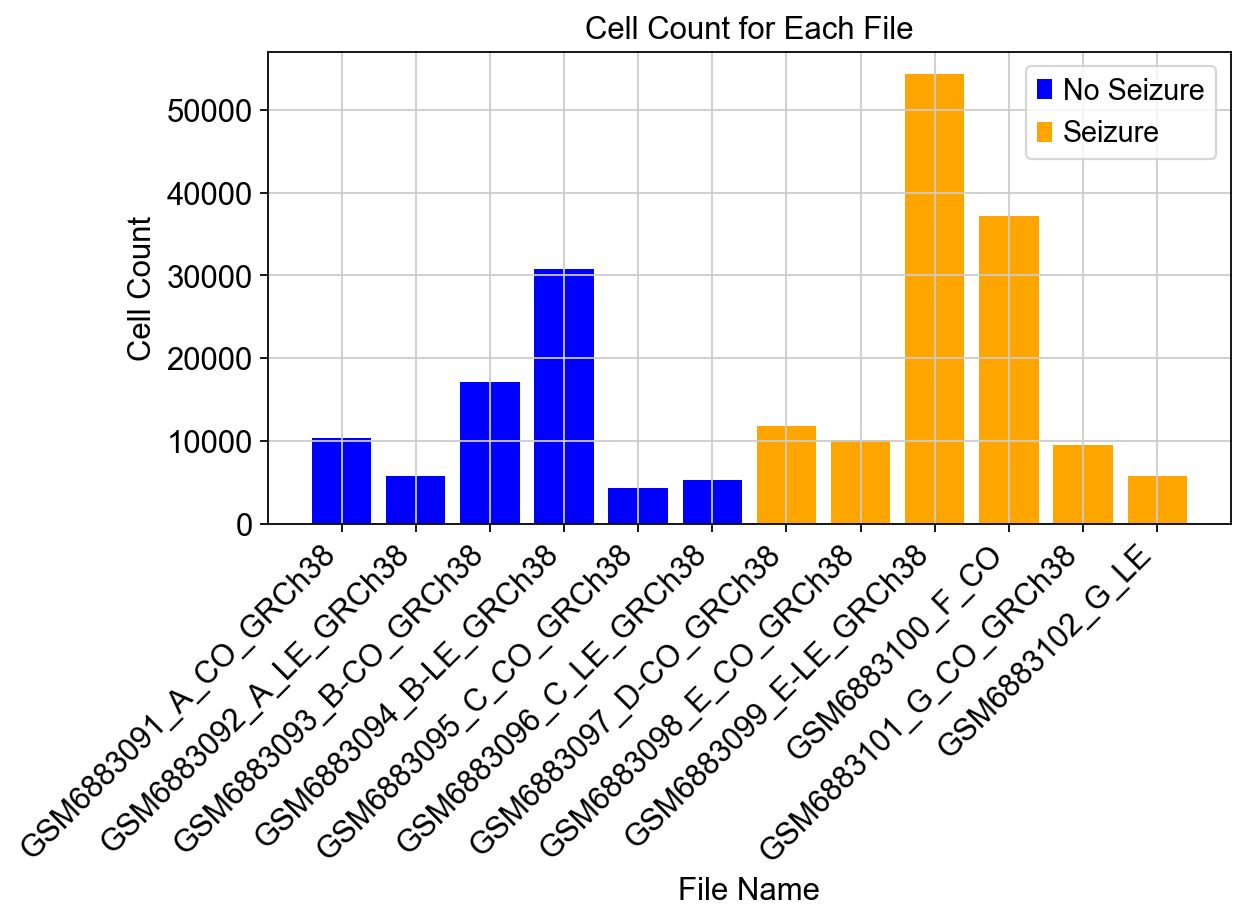

In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd

# List of file paths and corresponding conditions
file_paths = file_paths_no_seizure + file_paths_seizure
conditions = ['no seizure'] * len(file_paths_no_seizure) + ['seizure'] * len(file_paths_seizure)

# Extract file names
file_names = [os.path.basename(path) for path in file_paths]

# Get cell and gene counts for each file
cell_counts = [adata.n_obs for adata in adata_list_no_seizure] + [adata.n_obs for adata in adata_list_seizure]
gene_counts = [adata.n_vars for adata in adata_list_no_seizure] + [adata.n_vars for adata in adata_list_seizure]

# Create a DataFrame for visualization
data = pd.DataFrame({'File Name': file_names, 'Condition': conditions, 'Cell Count': cell_counts, 'Gene Count': gene_counts})

plt.figure(figsize=(8, 6))
bars = plt.bar(data['File Name'], data['Cell Count'], color=data['Condition'].map({'no seizure': 'blue', 'seizure': 'orange'}))
plt.xlabel('File Name')
plt.ylabel('Cell Count')
plt.title('Cell Count for Each File')
plt.xticks(rotation=45, ha='right')

# Create custom legend labels
legend_labels = {'no seizure': 'No Seizure', 'seizure': 'Seizure'}

# Add legend with custom labels in the upper right corner
plt.legend([bars[0], bars[-1]], [legend_labels['no seizure'], legend_labels['seizure']], loc='upper right')

plt.tight_layout()
plt.show()


In [4]:
# Calculate the number of genes for each AnnData object
gene_counts_no_seizure = [adata.n_vars for adata in adata_list_no_seizure]
gene_counts_seizure = [adata.n_vars for adata in adata_list_seizure]

# Print the gene counts for each file
for i, path in enumerate(file_paths_no_seizure):
    print(f"File: {os.path.basename(path)}, Gene Count (No Seizure): {gene_counts_no_seizure[i]}")

for i, path in enumerate(file_paths_seizure):
    print(f"File: {os.path.basename(path)}, Gene Count (Seizure): {gene_counts_seizure[i]}")

File: GSM6883091_A_CO_GRCh38, Gene Count (No Seizure): 33538
File: GSM6883092_A_LE_GRCh38, Gene Count (No Seizure): 33538
File: GSM6883093_B-CO_GRCh38, Gene Count (No Seizure): 33538
File: GSM6883094_B-LE_GRCh38, Gene Count (No Seizure): 33538
File: GSM6883095_C_CO_GRCh38, Gene Count (No Seizure): 33538
File: GSM6883096_C_LE_GRCh38, Gene Count (No Seizure): 33538
File: GSM6883097_D-CO_GRCh38, Gene Count (Seizure): 33538
File: GSM6883098_E_CO_GRCh38, Gene Count (Seizure): 33538
File: GSM6883099_E-LE_GRCh38, Gene Count (Seizure): 33538
File: GSM6883100_F_CO, Gene Count (Seizure): 33538
File: GSM6883101_G_CO_GRCh38, Gene Count (Seizure): 33538
File: GSM6883102_G_LE, Gene Count (Seizure): 33538


In [5]:
adata

AnnData object with n_obs × n_vars = 202056 × 33538
    obs: 'condition', 'batch'

In [6]:
print(adata.obs.shape)
adata.obs.head()

(202056, 2)


condition batch
AAACCCAAGAATCGCG-1-0  no seizure     0
AAACCCAAGAATTGCA-1-0  no seizure     0
AAACCCAAGACGGAAA-1-0  no seizure     0
AAACCCAAGGAGGTTC-1-0  no seizure     0
AAACCCAGTAGTCTGT-1-0  no seizure     0

In [7]:
print(adata.var.shape)
adata.var.head()

(33538, 0)


Empty DataFrame
Columns: []
Index: [MIR1302-2HG, FAM138A, OR4F5, AL627309.1, AL627309.3]

In [8]:
adata.var_names 

Index(['MIR1302-2HG', 'FAM138A', 'OR4F5', 'AL627309.1', 'AL627309.3',
       'AL627309.2', 'AL627309.4', 'AL732372.1', 'OR4F29', 'AC114498.1',
       ...
       'AC007325.2', 'BX072566.1', 'AL354822.1', 'AC023491.2', 'AC004556.1',
       'AC233755.2', 'AC233755.1', 'AC240274.1', 'AC213203.1', 'FAM231C'],
      dtype='object', length=33538)

In [9]:
adata.X

<202056x33538 sparse matrix of type '<class 'numpy.float32'>'
	with 170927067 stored elements in Compressed Sparse Row format>

In [10]:
sum0 = np.sum(adata.X,axis = 0)
print ( (sum0 == 0).sum() , ' number of totally zero expressed genes ' )
print( np.round( (adata.X != 0).sum()/ (adata.X.shape[0]*adata.X.shape[1]) * 100 , 2) ,' % of non-zeros in data' ) 

4467  number of totally zero expressed genes 
2.52  % of non-zeros in data


In [11]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 260 cells that have less than 200 genes expressed
filtered out 6786 genes that are detected in less than 3 cells


# 2. Data Quality Control

In [12]:
qc1 = sc.pp.calculate_qc_metrics(adata)
                            
cell_dataframe = qc1[0]
gene_dataframe = qc1[1]

cell_dataframe.head()

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


n_genes_by_counts  log1p_n_genes_by_counts  \
AAACCCAAGAATCGCG-1-0                382                 5.948035   
AAACCCAAGAATTGCA-1-0               1232                 7.117206   
AAACCCAAGACGGAAA-1-0                744                 6.613384   
AAACCCAAGGAGGTTC-1-0                744                 6.613384   
AAACCCAGTAGTCTGT-1-0               2664                 7.887959   

                      total_counts  log1p_total_counts  \
AAACCCAAGAATCGCG-1-0         603.0            6.403574   
AAACCCAAGAATTGCA-1-0        2498.0            7.823646   
AAACCCAAGACGGAAA-1-0        1474.0            7.296413   
AAACCCAAGGAGGTTC-1-0        1565.0            7.356280   
AAACCCAGTAGTCTGT-1-0        6609.0            8.796339   

                      pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACCCAAGAATCGCG-1-0                   39.469320                    53.233831   
AAACCCAAGAATTGCA-1-0                   31.625300                    41.953563   
AAACCCAAGACGGAAA-1-0                   41.044776                    50.881954   
AAACCCAAGGAGGTTC-1-0                   44.664537                    53.290735   
AAACCCAGTAGTCTGT-1-0                   22.439098                    33.363595   

                      pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  
AAACCCAAGAATCGCG-1-0                    69.817579                   100.000000  
AAACCCAAGAATTGCA-1-0                    53.642914                    70.696557  
AAACCCAAGACGGAAA-1-0                    63.093623                    83.446404  
AAACCCAAGGAGGTTC-1-0                    65.239617                    84.408946  
AAACCCAGTAGTCTGT-1-0                    44.484793                    60.130126

In [13]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')  # annotate the group of mitochondrial genes as 'mt'
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], percent_top=None, log1p=False, inplace=True)
adata.var['mt'].sum()

13

normalizing counts per cell


/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


    finished (0:00:00)


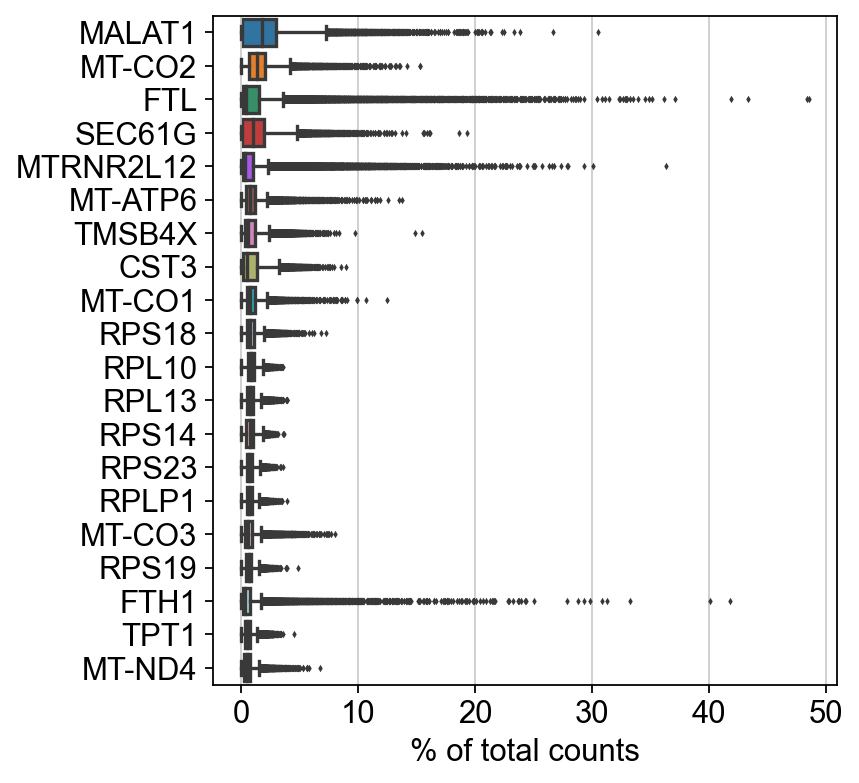

In [14]:
# 显示在所有细胞中，每个单细胞中计数率最高的基因。
sc.pl.highest_expr_genes(adata[adata.obs['condition'] == 'no seizure'], n_top=20) #n_top指的是选前n个参数

# 3. Data Analysis

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


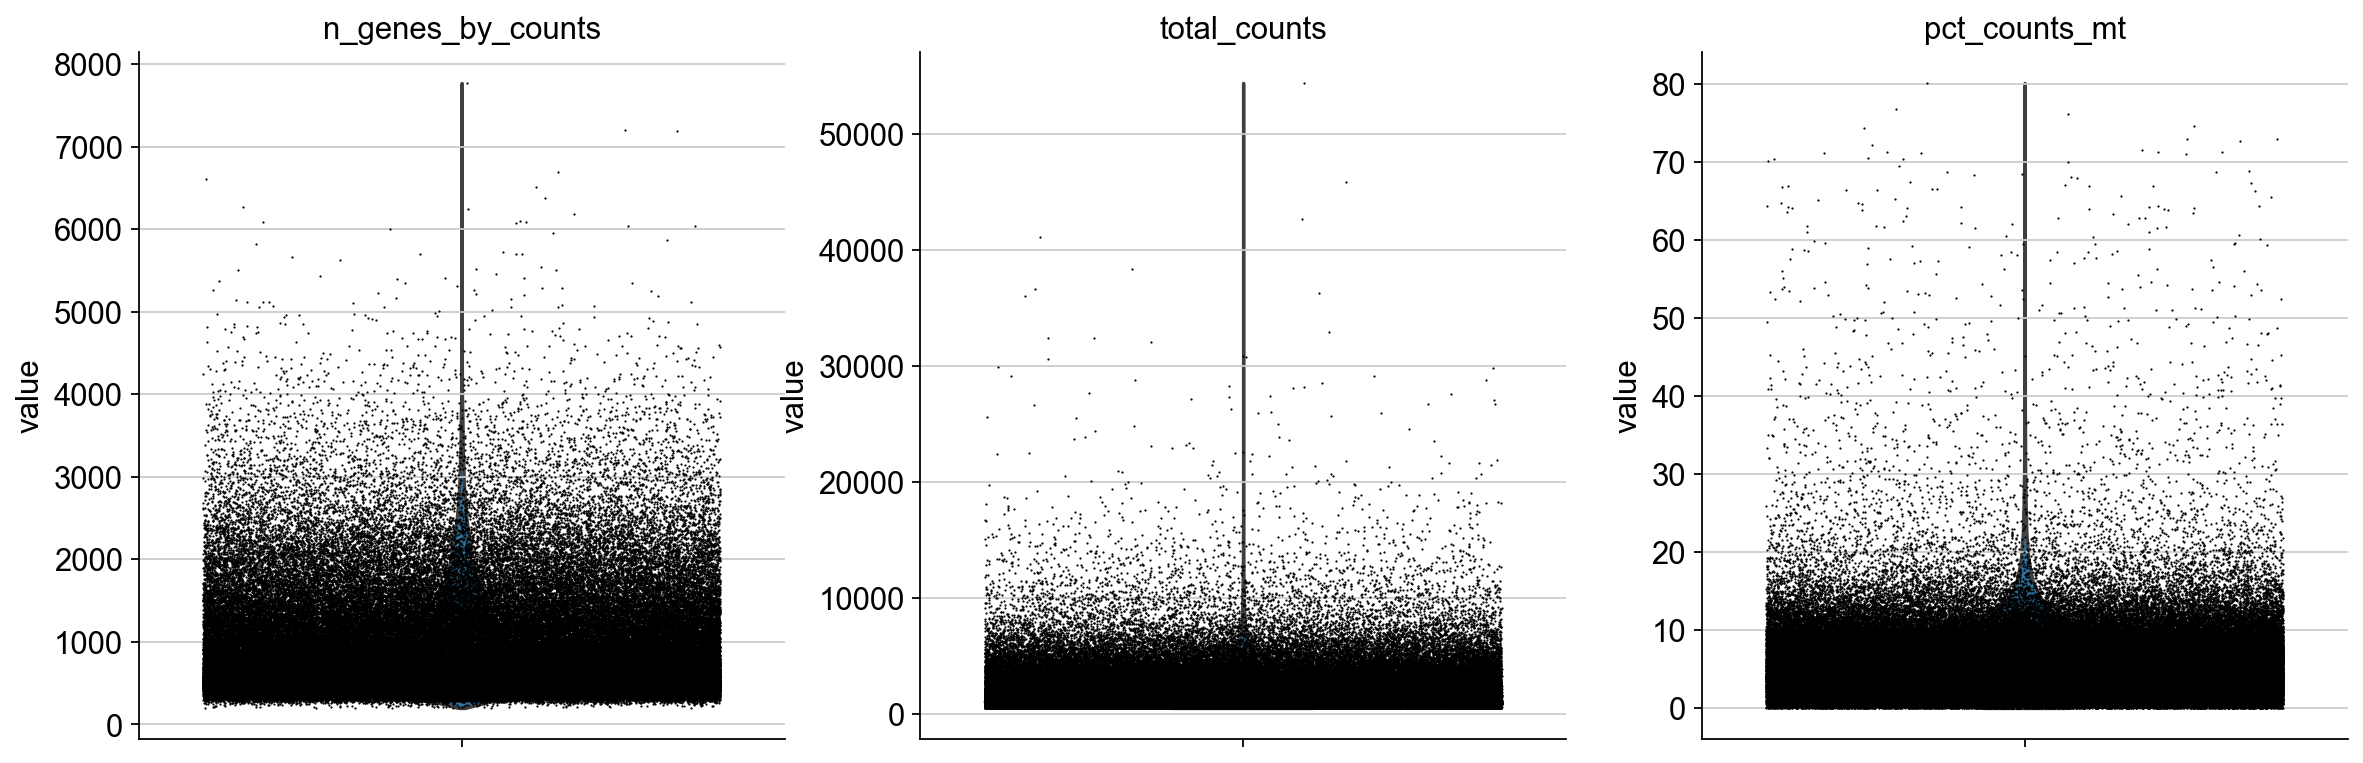

In [15]:
sc.pl.violin(adata, ['n_genes_by_counts', 'total_counts', 'pct_counts_mt'],
             jitter=0.4, multi_panel=True)

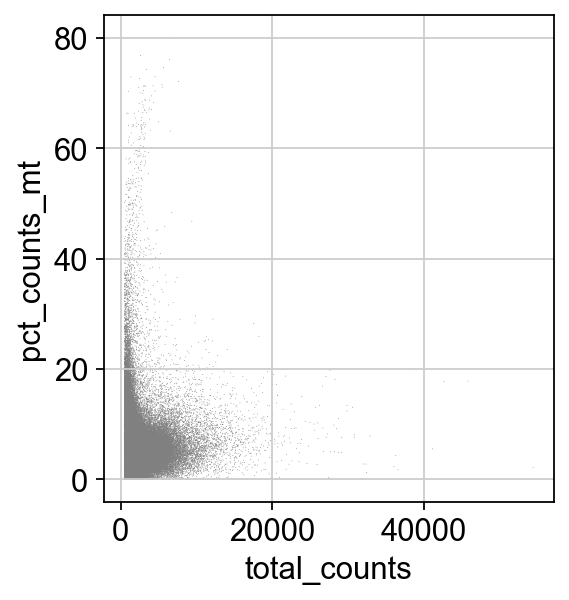

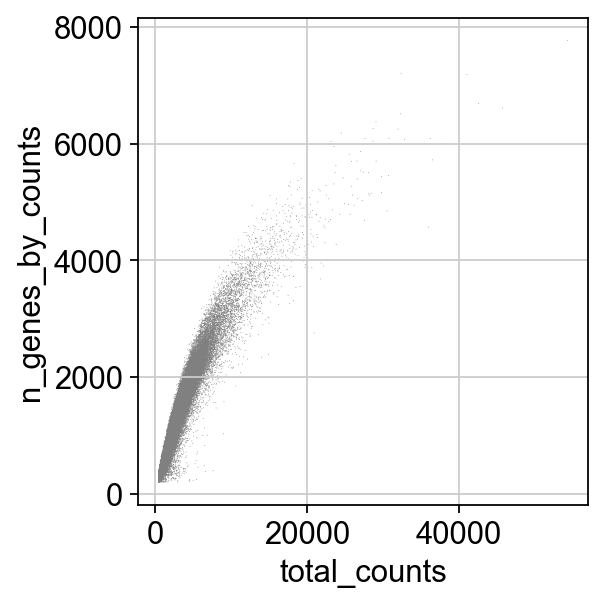

In [16]:
sc.pl.scatter(adata, x='total_counts', y='pct_counts_mt')
sc.pl.scatter(adata, x='total_counts', y='n_genes_by_counts')

In [17]:
# 获取线粒体基因占比在 20% 以下的细胞样本
adata = adata[adata.obs.pct_counts_mt < 20, :]

# 获取表达基因数在 2500 以下的细胞样本
adata = adata[adata.obs.n_genes_by_counts < 4000, :]

# 获取表达总表达量在20000以下的细胞样本
adata = adata[adata.obs.total_counts < 20_000, :]

adata

View of AnnData object with n_obs × n_vars = 199098 × 26752
    obs: 'condition', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'

# 3. PCA

In [18]:
sc.pp.normalize_total(adata, target_sum=1e4)

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:170: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


normalizing counts per cell
    finished (0:00:00)


In [19]:
sc.pp.log1p(adata)

In [20]:
adata.raw = adata

In [21]:
sc.pp.highly_variable_genes(adata, min_mean=0.0125, max_mean=3, min_disp=0.5)

extracting highly variable genes
    finished (0:00:01)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


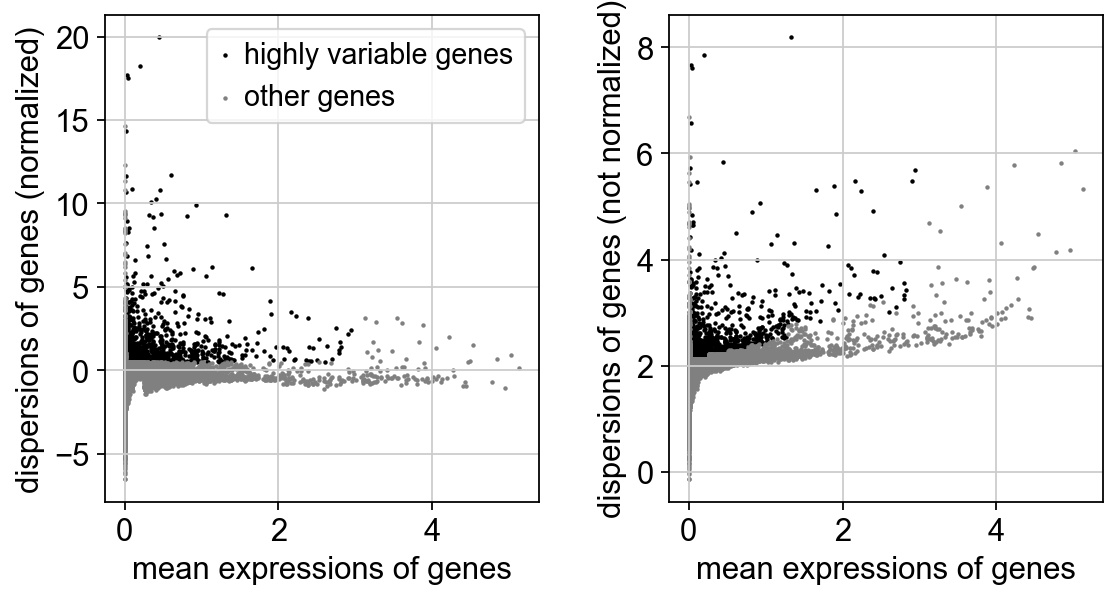

In [22]:
sc.pl.highly_variable_genes(adata)

In [23]:
# 获取只有特异性基因的数据集
adata = adata[:, adata.var.highly_variable]
highly_variable_genes_names = adata.var_names[adata.var.highly_variable]
print(highly_variable_genes_names)

Index(['FAM41C', 'HES4', 'ISG15', 'TNFRSF18', 'TNFRSF4', 'MXRA8', 'ANKRD65',
       'VWA1', 'ATAD3C', 'HES5',
       ...
       'MX1', 'RSPH1', 'ITGB2', 'COL18A1', 'AJ011932.1', 'COL6A1', 'COL6A2',
       'SPATC1L', 'S100B', 'AC004556.1'],
      dtype='object', length=2771)


In [24]:
import scanpy as sc
# Set the number of jobs to use for parallel processing
n_jobs = 10  # You can adjust this number based on your hardware

# Perform regression with parallel processing
sc.pp.regress_out(adata, keys=['total_counts', 'pct_counts_mt'], n_jobs=n_jobs)

regressing out ['total_counts', 'pct_counts_mt']
    sparse input is densified and may lead to high memory use
    finished (0:03:24)


In [25]:
sc.pp.scale(adata, max_value=10)

In [26]:
sc.tl.pca(adata)

computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:01:05)


In [27]:
import scanpy.external as sce
sce.pp.harmony_integrate(adata, 'condition')

2023-08-18 19:55:48,030 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-18 19:56:23,014 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-18 19:56:23,540 - harmonypy - INFO - Iteration 1 of 10
2023-08-18 19:57:11,745 - harmonypy - INFO - Iteration 2 of 10
2023-08-18 19:57:59,019 - harmonypy - INFO - Converged after 2 iterations


In [28]:
'X_pca_harmony' in adata.obsm

True

In [29]:
adata.obsm['X_pca'] = adata.obsm['X_pca_harmony']

In [30]:
adata

AnnData object with n_obs × n_vars = 199098 × 2771
    obs: 'condition', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca'
    obsm: 'X_pca', 'X_pca_harmony'
    varm: 'PCs'

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


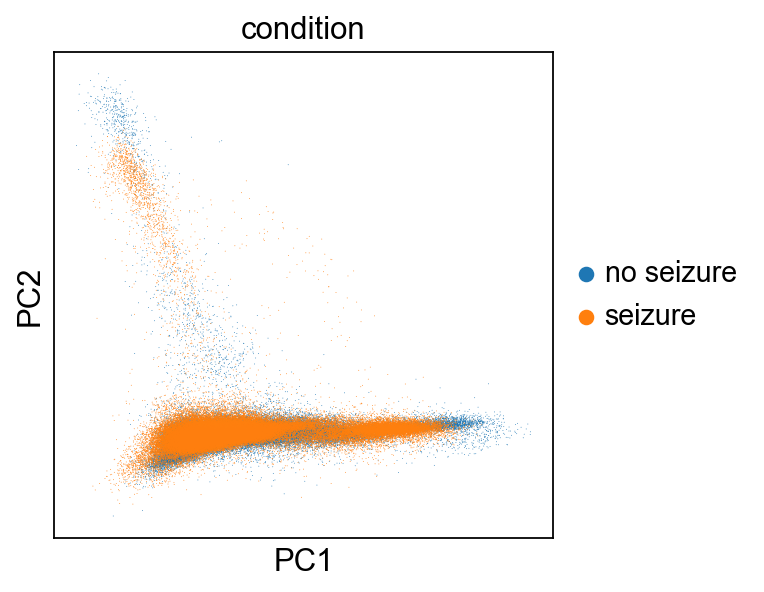

In [31]:
sc.pl.pca(adata, color='condition')

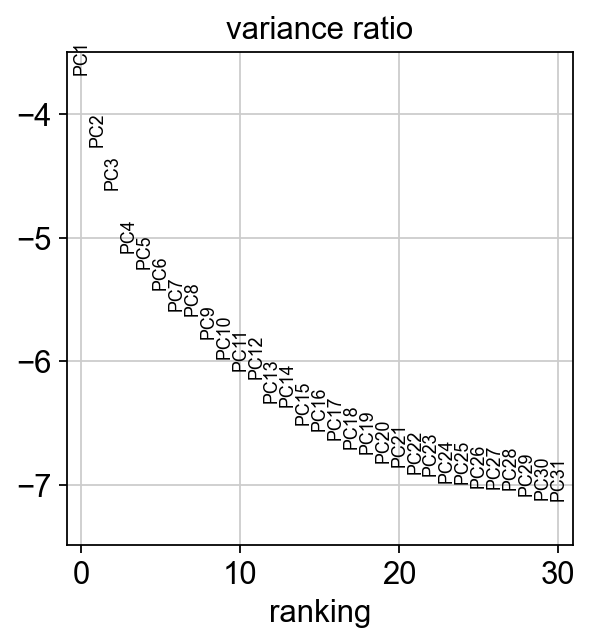

In [32]:
sc.pl.pca_variance_ratio(adata, log=True)

# 4. 聚类

In [33]:
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=31)

computing neighbors
    using 'X_pca' with n_pcs = 31
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:18)


In [34]:
sc.tl.umap(adata)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:01:13)


/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


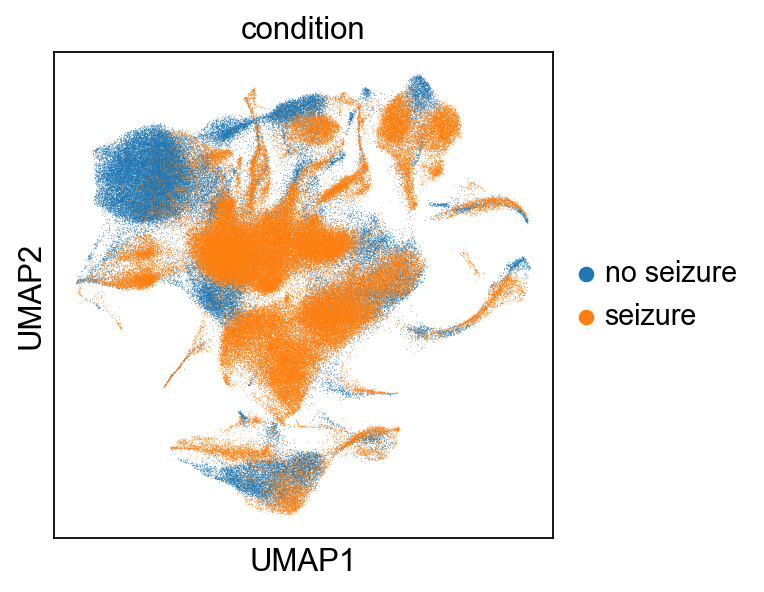

In [35]:
sc.pl.umap(adata, color=['condition'])

In [36]:
sc.tl.leiden(adata)

running Leiden clustering
    finished: found 28 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:02:50)


/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


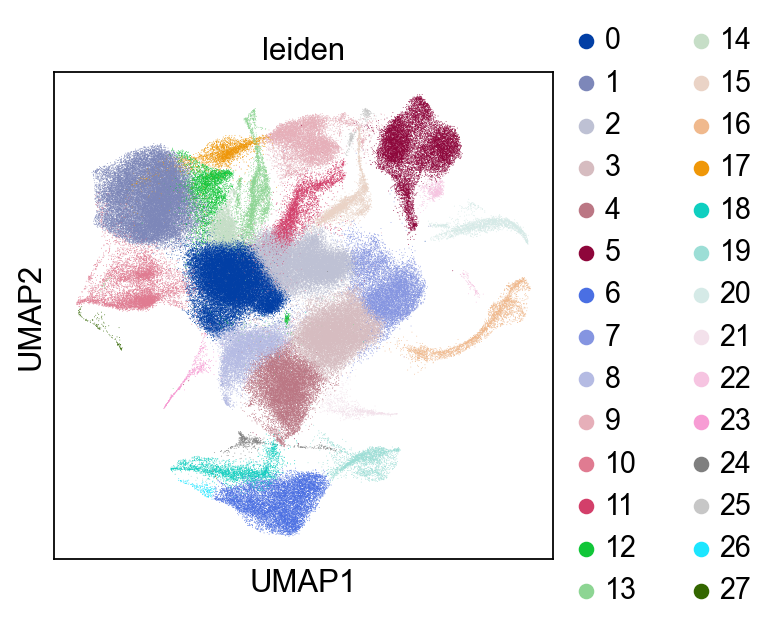

In [37]:
sc.pl.umap(adata, color=['leiden'])

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


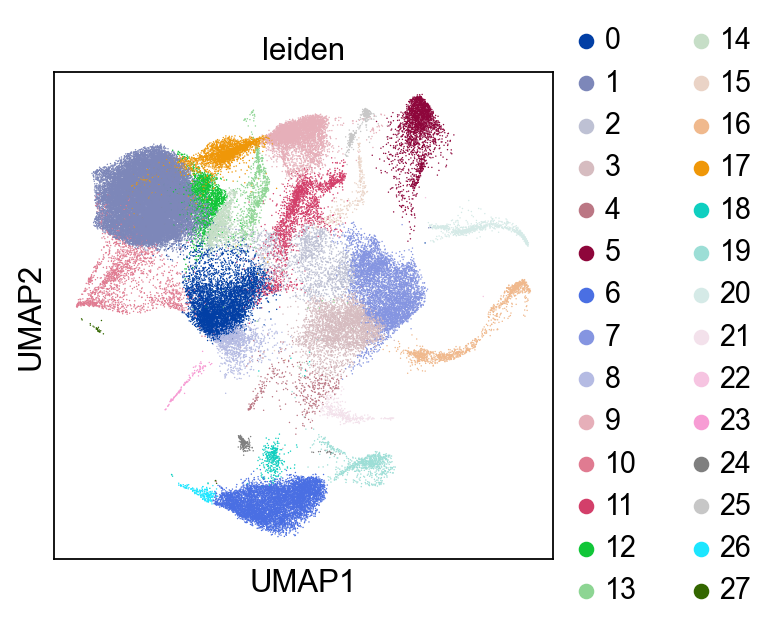

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


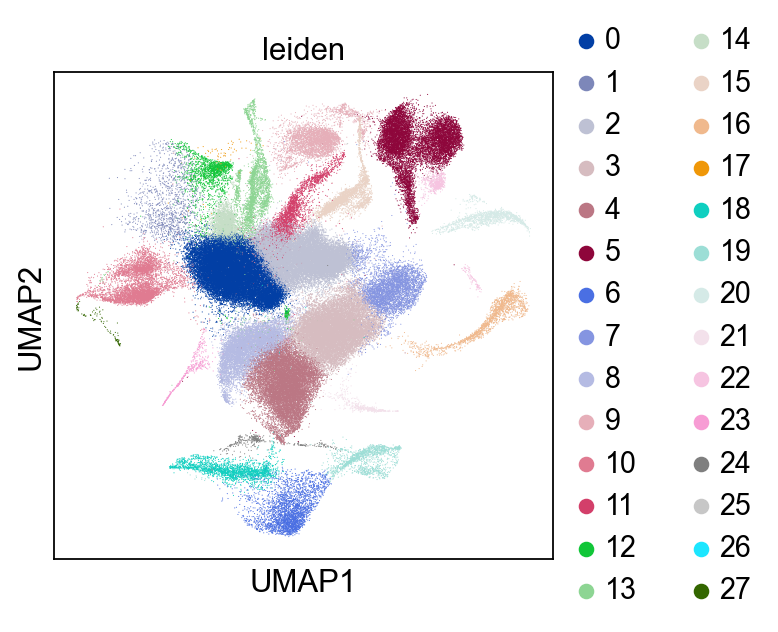

In [38]:
import matplotlib.pyplot as plt

# 筛选出无癫痫的细胞和有癫痫的细胞
adata_no_seizure = adata[adata.obs['condition'] == 'no seizure']
adata_seizure = adata[adata.obs['condition'] == 'seizure']

# 绘制无癫痫细胞的Leiden图
sc.pl.umap(adata_no_seizure, color=['leiden'])

# 绘制有癫痫细胞的Leiden图
sc.pl.umap(adata_seizure, color=['leiden'])

# 显示图像
plt.show()

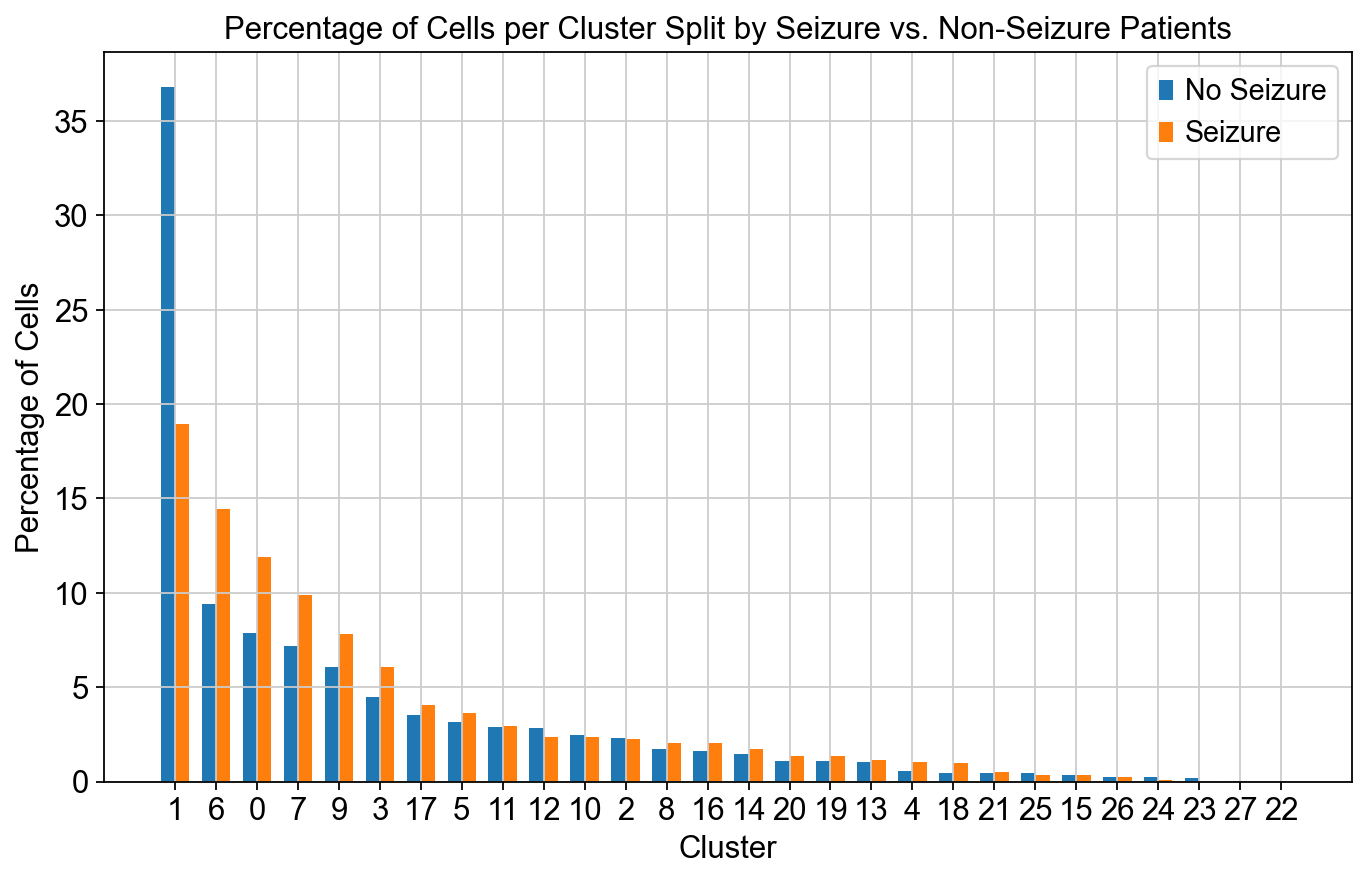

In [39]:
import pandas as pd
import matplotlib.pyplot as plt

# 计算每个聚类簇中有癫痫和无癫痫患者的细胞数量
cell_count_per_cluster_no_seizure = adata_no_seizure.obs['leiden'].value_counts()
cell_count_per_cluster_seizure = adata_seizure.obs['leiden'].value_counts()

# 计算每个聚类簇中有癫痫和无癫痫患者的细胞百分比
total_cells_no_seizure = len(adata_no_seizure)
total_cells_seizure = len(adata_seizure)
percentage_per_cluster_no_seizure = (cell_count_per_cluster_no_seizure / total_cells_no_seizure) * 100
percentage_per_cluster_seizure = (cell_count_per_cluster_seizure / total_cells_seizure) * 100

plt.figure(figsize=(10, 6))
# 绘制条形图
clusters = cell_count_per_cluster_no_seizure.index.tolist()
width = 0.35
x = range(len(clusters))

plt.bar(x, percentage_per_cluster_no_seizure, width, label='No Seizure')
plt.bar([i + width for i in x], percentage_per_cluster_seizure, width, label='Seizure')

plt.xticks([i + width/2 for i in x], clusters)
plt.xlabel('Cluster')
plt.ylabel('Percentage of Cells')
plt.title('Percentage of Cells per Cluster Split by Seizure vs. Non-Seizure Patients')
plt.legend()

# 显示图像
plt.show()


In [40]:
adata

AnnData object with n_obs × n_vars = 199098 × 2771
    obs: 'condition', 'batch', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'log1p', 'hvg', 'pca', 'condition_colors', 'neighbors', 'umap', 'leiden', 'leiden_colors'
    obsm: 'X_pca', 'X_pca_harmony', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

# 5. 基因表达差异分析

In [41]:
sc.tl.rank_genes_groups(adata, 'condition', method='wilcoxon')

ranking genes
    finished: added to `.uns['rank_genes_groups']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:06:41)


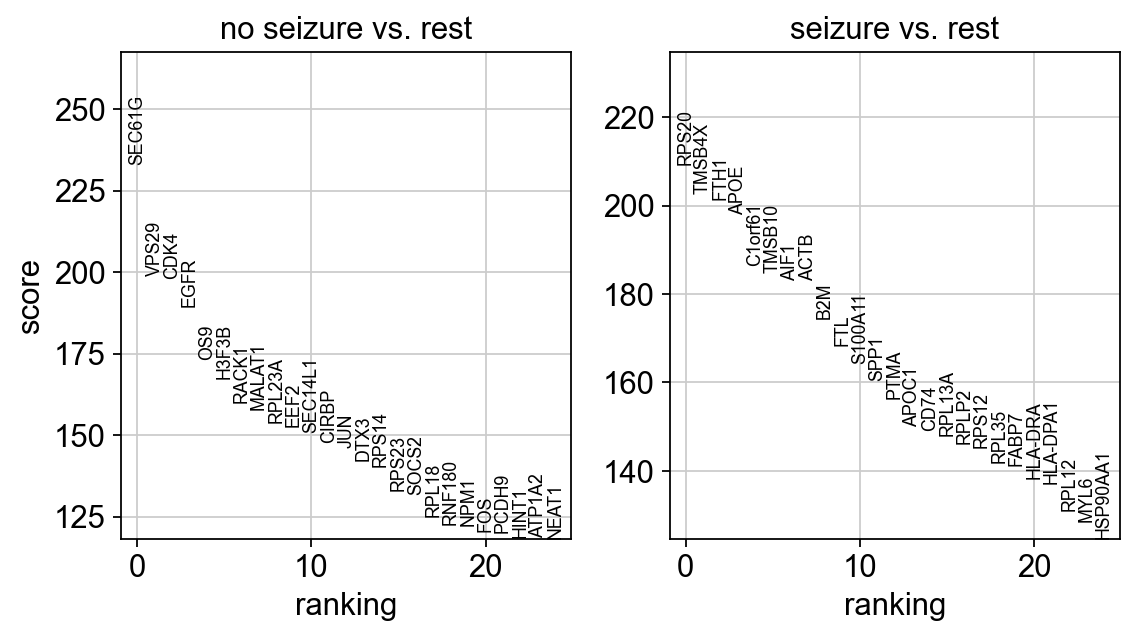

In [42]:
sc.pl.rank_genes_groups(adata, n_genes=25, sharey=False)

/Users/hongyuanding/anaconda3/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


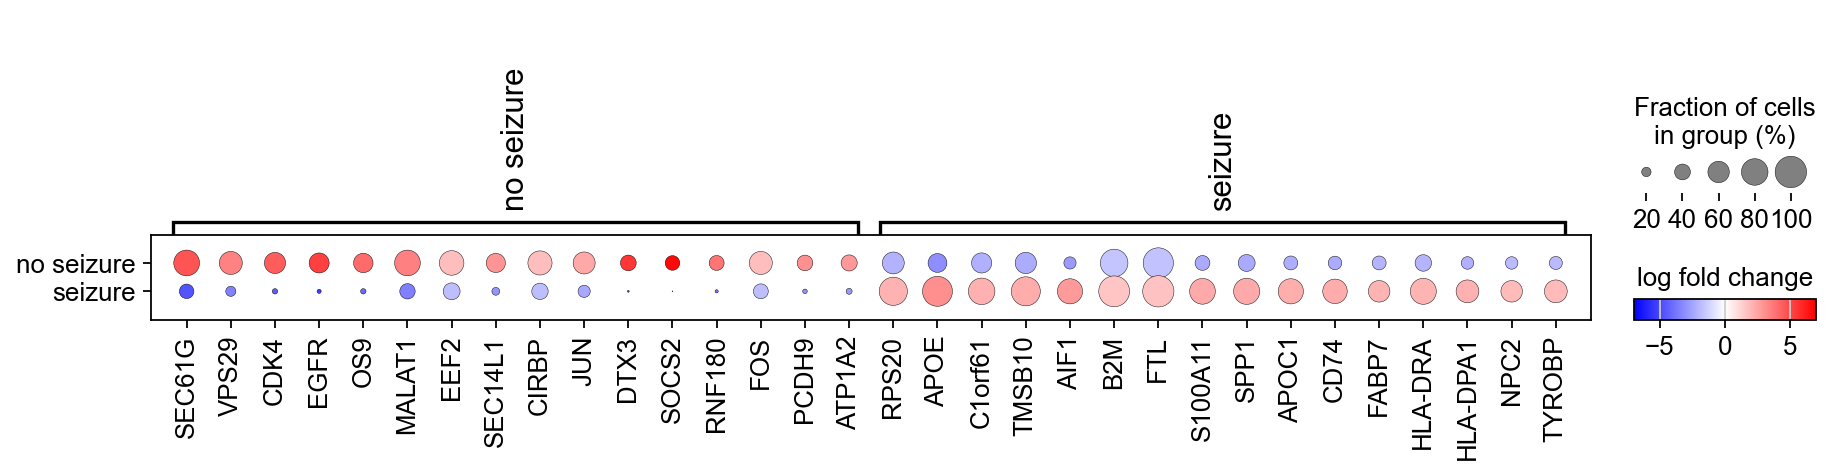

In [43]:
sc.pl.rank_genes_groups_dotplot(adata, n_genes=16, values_to_plot='logfoldchanges', min_logfoldchange=1.5, vmax=7, vmin=-7, cmap='bwr')

    using 'X_pca' with n_pcs = 50
Storing dendrogram info using `.uns['dendrogram_condition']`


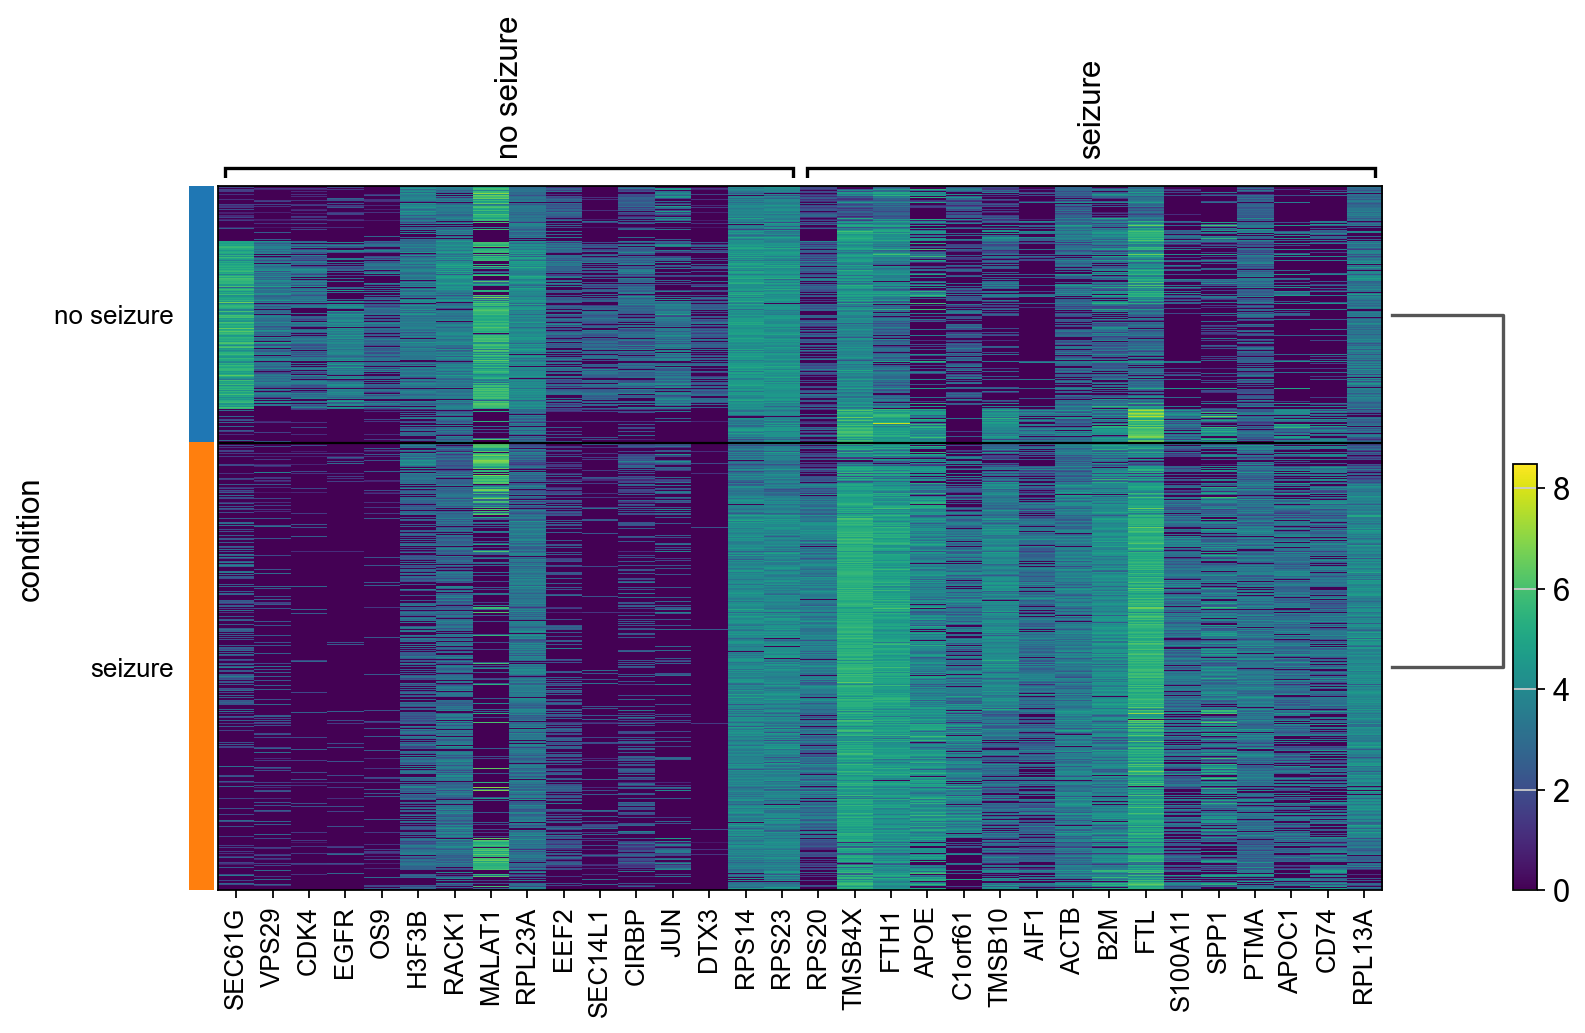

In [44]:
sc.pl.rank_genes_groups_heatmap(adata, n_genes=16);

In [45]:
results = adata.uns['rank_genes_groups']
results

{'params': {'groupby': 'condition',
  'reference': 'rest',
  'method': 'wilcoxon',
  'use_raw': True,
  'layer': None,
  'corr_method': 'benjamini-hochberg'},
 'names': rec.array([('SEC61G', 'RPS20'), ('VPS29', 'TMSB4X'), ('CDK4', 'FTH1'),
            ..., ('FTH1', 'CDK4'), ('TMSB4X', 'VPS29'),
            ('RPS20', 'SEC61G')],
           dtype=[('no seizure', 'O'), ('seizure', 'O')]),
 'scores': rec.array([( 233.04121,  209.29324), ( 198.93936,  202.6008 ),
            ( 197.80931,  201.22522), ..., (-201.22522, -197.80931),
            (-202.6008 , -198.93936), (-209.29324, -233.04121)],
           dtype=[('no seizure', '<f4'), ('seizure', '<f4')]),
 'pvals': rec.array([(0., 0.), (0., 0.), (0., 0.), ..., (0., 0.), (0., 0.),
            (0., 0.)],
           dtype=[('no seizure', '<f8'), ('seizure', '<f8')]),
 'pvals_adj': rec.array([(0., 0.), (0., 0.), (0., 0.), ..., (0., 0.), (0., 0.),
            (0., 0.)],
           dtype=[('no seizure', '<f8'), ('seizure', '<f8')]),
 'logfoldcha

In [46]:
# 从adata.uns['rank_genes_groups']获取差异表达结果
results = adata.uns['rank_genes_groups']
seizure_cluster_key = "seizure"
seizure_results = pd.DataFrame(results['names'][seizure_cluster_key], columns=['gene'])
seizure_results['logfoldchanges'] = results['logfoldchanges'][seizure_cluster_key]
seizure_results['pvals'] = results['pvals'][seizure_cluster_key]
seizure_results['pvals_adj'] = results['pvals_adj'][seizure_cluster_key]

# 过滤数据框以仅获取显着差异表达的基因（例如，调整后的 p 值 < 0.01）
seizure_specific_genes = seizure_results[(seizure_results['pvals_adj'] < 0.05) & (abs(seizure_results['logfoldchanges']) > 0.05)]

# 打印癫痫患者的特定标记基因
print("Seizure-specific marker genes:")
print(seizure_specific_genes)

Seizure-specific marker genes:
          gene  logfoldchanges  pvals  pvals_adj
0        RPS20        2.101978    0.0        0.0
1       TMSB4X        1.291951    0.0        0.0
2         FTH1        1.485857    0.0        0.0
3         APOE        3.088444    0.0        0.0
4      C1orf61        2.151073    0.0        0.0
...        ...             ...    ...        ...
26747      OS9       -4.048673    0.0        0.0
26748     EGFR       -5.246526    0.0        0.0
26749     CDK4       -4.454290    0.0        0.0
26750    VPS29       -3.409929    0.0        0.0
26751   SEC61G       -4.680971    0.0        0.0

[8307 rows x 4 columns]


In [47]:
# 获取core上调基因（p < 0.01，logfoldchanges > 0）
seizure_upregulated_genes = seizure_specific_genes[(seizure_specific_genes['pvals'] < 0.01) & (seizure_specific_genes['logfoldchanges'] > 0.05)]

# 获取下调基因（p < 0.01，logfoldchanges < 0）
seizure_downregulated_genes = seizure_specific_genes[(seizure_specific_genes['pvals'] < 0.01) & (seizure_specific_genes['logfoldchanges'] < -0.05)]

# 打印上调基因
print("Seizure upregulated genes:")
print(seizure_upregulated_genes)

# 打印下调基因
print("Seizure downregulated genes:")
print(seizure_downregulated_genes)


Seizure upregulated genes:
          gene  logfoldchanges     pvals  pvals_adj
0        RPS20        2.101978  0.000000   0.000000
1       TMSB4X        1.291951  0.000000   0.000000
2         FTH1        1.485857  0.000000   0.000000
3         APOE        3.088444  0.000000   0.000000
4      C1orf61        2.151073  0.000000   0.000000
...        ...             ...       ...        ...
20978    PTPRA        0.067489  0.001081   0.003975
21066     ENAH        0.116918  0.000831   0.003101
21128   POLR2H        0.062403  0.000658   0.002481
21486  LAPTM4B        0.051007  0.000168   0.000674
21870    OLFM2        0.059525  0.000023   0.000098

[1726 rows x 4 columns]
Seizure downregulated genes:
           gene  logfoldchanges     pvals  pvals_adj
20262    POLR1E       -0.117200  0.009975   0.032508
20264     EDEM1       -0.549877  0.009776   0.031867
20265  SLC25A38       -0.188809  0.009737   0.031743
20266    ORMDL3       -0.281330  0.009719   0.031687
20267   TUBGCP3       -0.38648

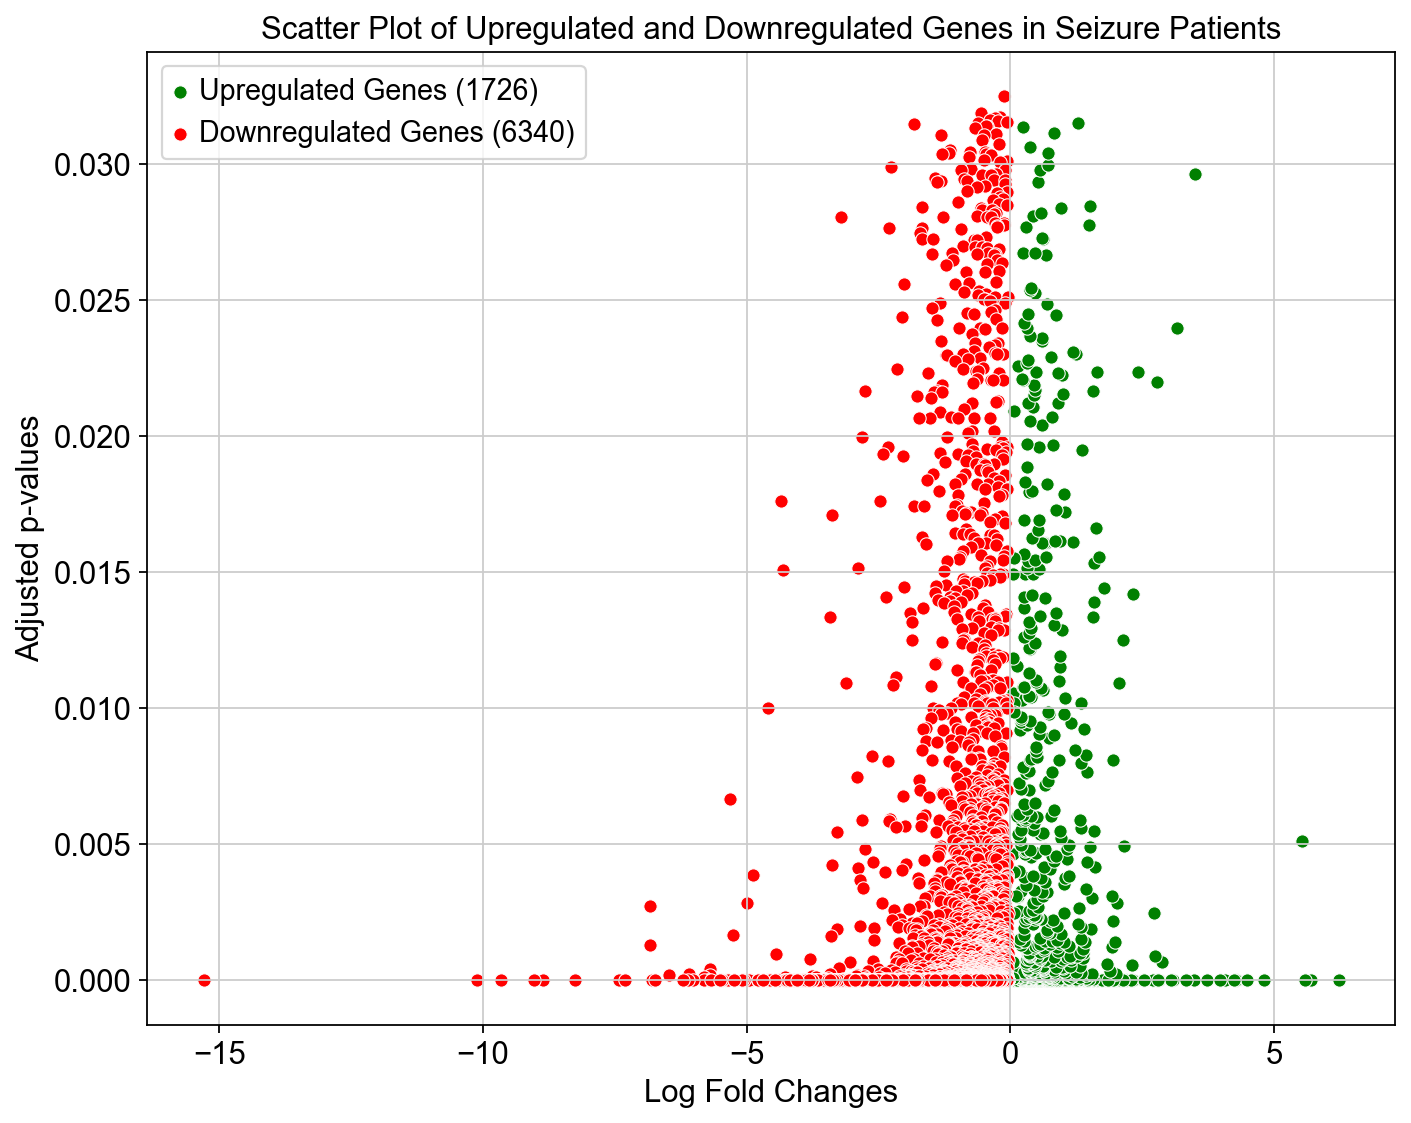

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# 统计上调和下调基因的数量
num_upregulated = len(seizure_upregulated_genes)
num_downregulated = len(seizure_downregulated_genes)

# 创建一个散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(x='logfoldchanges', y='pvals_adj', data=seizure_upregulated_genes, label=f'Upregulated Genes ({num_upregulated})', color='green')
sns.scatterplot(x='logfoldchanges', y='pvals_adj', data=seizure_downregulated_genes, label=f'Downregulated Genes ({num_downregulated})', color='red')

# 添加标题和标签
plt.title('Scatter Plot of Upregulated and Downregulated Genes in Seizure Patients')
plt.xlabel('Log Fold Changes')
plt.ylabel('Adjusted p-values')

# 显示图例
plt.legend()

# 显示图像
plt.show()


In [49]:
# 获取上调基因的表达数据
upregulated_gene_expression = adata.raw[:, seizure_upregulated_genes['gene']].X

# 获取下调基因的表达数据
downregulated_gene_expression = adata.raw[:, seizure_downregulated_genes['gene']].X

In [50]:
#upregulated_gene_expression = upregulated_gene_expression.T
upregulated_gene_expression

<199098x1726 sparse matrix of type '<class 'numpy.float32'>'
	with 53479289 stored elements in Compressed Sparse Row format>

In [51]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from scipy.sparse import issparse

# 假设你已经有了上调基因的表达数据 upregulated_gene_expression
upregulated_gene_expression = adata.raw[:, seizure_upregulated_genes['gene']].X

# 如果 upregulated_gene_expression 是稀疏矩阵，将其转换为稠密矩阵
if issparse(upregulated_gene_expression):
    upregulated_gene_expression = upregulated_gene_expression.toarray()

# 计算皮尔逊相关系数矩阵
correlation_matrix = np.corrcoef(upregulated_gene_expression, rowvar=False)

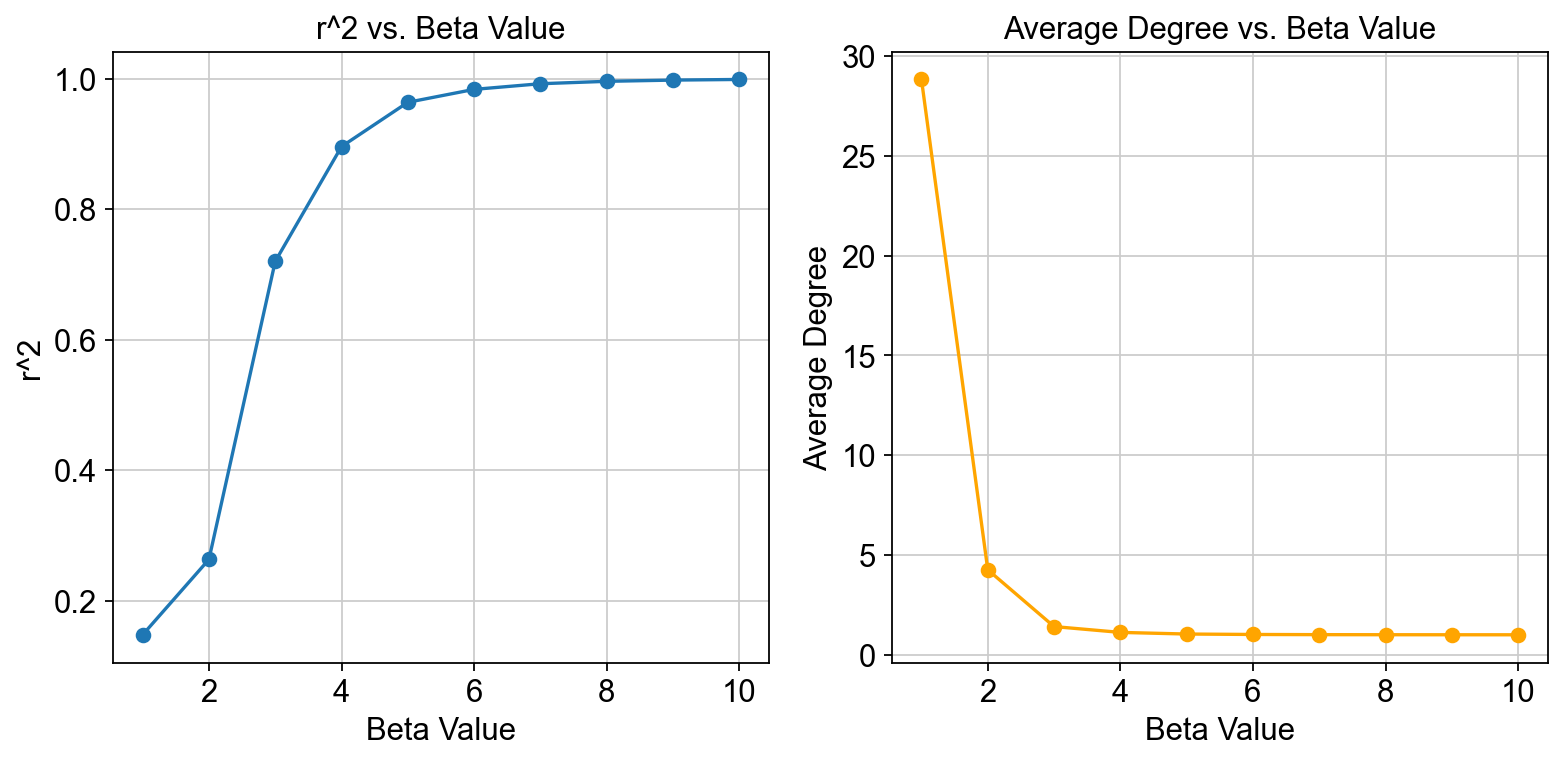

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# 定义 beta 值的范围
beta_values = np.arange(1, 11)

r_squared_values = []  # 存储计算得到的 r^2 值
average_degree_values = []  # 存储计算得到的平均连接度值

# 计算加权邻接矩阵
def calculate_adjacency_matrix(matrix, beta):
    return np.power(matrix, beta)

# 计算 r^2 值（模块质量）
def calculate_r_squared(adjacency_matrix):
    n = adjacency_matrix.shape[0]  # 节点数量
    k_total = np.sum(adjacency_matrix) / 2  # 总连接数，除以2是因为是无向图
    
    # 计算节点的度
    node_degrees = np.sum(adjacency_matrix, axis=0)
    
    # 计算每个节点在模块内部的连接度之和
    k_in = np.sum(adjacency_matrix * adjacency_matrix) / 2
    
    # 计算 r^2 值
    r_squared = k_in / k_total
    return r_squared

# 对每个 beta 值进行计算和绘制
for beta in beta_values:
    # 使用当前 beta 值计算加权邻接矩阵
    adjacency_matrix = calculate_adjacency_matrix(correlation_matrix, beta)
    
    # 计算 r^2 值
    r_squared = calculate_r_squared(adjacency_matrix)
    r_squared_values.append(r_squared)
    
    # 计算平均连接度
    average_degree = np.mean(np.sum(adjacency_matrix, axis=0))
    average_degree_values.append(average_degree)

# 绘制 "r^2 vs. beta" 图
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(beta_values, r_squared_values, marker='o')
plt.xlabel('Beta Value')
plt.ylabel('r^2')
plt.title('r^2 vs. Beta Value')

plt.subplot(1, 2, 2)
plt.plot(beta_values, average_degree_values, marker='o', color='orange')
plt.xlabel('Beta Value')
plt.ylabel('Average Degree')
plt.title('Average Degree vs. Beta Value')

plt.tight_layout()
plt.show()


In [53]:
import numpy as np

threshold = 0.8  # r^2 阈值

best_beta = None
for beta, r_squared in zip(beta_values, r_squared_values):
    if r_squared >= threshold:
        best_beta = beta
        break

if best_beta is None:
    print("No suitable beta value found.")
else:
    print(f"Best beta value: {best_beta}")

# 使用最佳 beta 值计算加权邻接矩阵
best_adjacency_matrix = calculate_adjacency_matrix(correlation_matrix, best_beta)


# 计算拓扑重叠矩阵
def calculate_topological_overlap_matrix(weighted_adjacency_matrix):
    # 计算节点度的平方和
    node_degrees = np.sum(weighted_adjacency_matrix, axis=0)
    node_degrees_squared = np.square(node_degrees)
    
    # 计算归一化的加权邻接矩阵
    normalized_weighted_adjacency_matrix = weighted_adjacency_matrix / node_degrees
    
    # 计算拓扑重叠矩阵
    topological_overlap_matrix = np.dot(normalized_weighted_adjacency_matrix, normalized_weighted_adjacency_matrix.T)
    return topological_overlap_matrix

# 使用加权邻接矩阵计算拓扑重叠矩阵
topological_overlap_matrix = calculate_topological_overlap_matrix(best_adjacency_matrix)

print("Topological Overlap Matrix:")
print(topological_overlap_matrix)


Best beta value: 4
Topological Overlap Matrix:
[[4.61510509e-01 6.54142933e-03 5.50799177e-03 ... 1.05509014e-06
  6.30648619e-06 7.89551700e-06]
 [6.54142933e-03 1.22054903e-01 3.81284008e-02 ... 6.06326369e-05
  1.89557860e-03 6.60542788e-04]
 [5.50799177e-03 3.81284008e-02 1.60000623e-01 ... 4.80478580e-06
  4.18581065e-04 2.54492172e-04]
 ...
 [1.05509014e-06 6.06326369e-05 4.80478580e-06 ... 9.98186755e-01
  7.64199530e-06 3.71895996e-07]
 [6.30648619e-06 1.89557860e-03 4.18581065e-04 ... 7.64199530e-06
  9.51889629e-01 1.96158905e-04]
 [7.89551700e-06 6.60542788e-04 2.54492172e-04 ... 3.71895996e-07
  1.96158905e-04 9.39709635e-01]]


In [54]:
import numpy as np
import networkx as nx
import community

# 将拓扑重叠矩阵转换为网络图
G = nx.Graph(topological_overlap_matrix)

gene_names = adata.var_names.tolist()

# 使用Louvain算法执行动态剪切树
partitions = community.best_partition(G, random_state=42)

# 将节点划分到不同的社区中
community_assignments = np.array(list(partitions.values()))

# 根据社区分配对基因进行分组
gene_groups = {}
for gene_name, community_id in zip(gene_names, community_assignments):
    if community_id not in gene_groups:
        gene_groups[community_id] = []
    gene_groups[community_id].append(gene_name)

# 过滤包含小于两个基因的模块
filtered_gene_groups = {community_id: genes for community_id, genes in gene_groups.items() if len(genes) > 5}

# 打印过滤后每个模块中的基因
for community_id, genes in filtered_gene_groups.items():
    print(f"Community {community_id}: {genes}")

Community 0: ['FAM41C', 'SMIM1', 'KCNAB2', 'SLC2A5', 'AL928921.2', 'CENPS', 'AGTRAP', 'SRARP', 'PADI2', 'PLA2G5', 'UBXN10', 'KIF17', 'NBPF3', 'AL109936.6', 'AL606491.1', 'FAM110D', 'CD52', 'RAB42', 'LINC01778', 'FABP3', 'TINAGL1', 'FNDC5', 'HPCA', 'CDCA8', 'MYCBP', 'KIF2C', 'DAB1', 'NEXN', 'IFI44L', 'CYR61', 'F3', 'AL359258.2', 'LIX1L-AS1', 'CTSS', 'S100A3', 'RAB13', 'GLMP', 'AIM2', 'ATP1A2', 'FMO2', 'CSRP1', 'AL445524.1', 'EDARADD', 'C2orf76', 'NOSTRIN', 'HMGB2']
Community 1: ['HES4', 'ISG15', 'TNFRSF18', 'MXRA8', 'ANKRD65', 'VWA1', 'ATAD3C', 'HES5', 'AL139246.5', 'TNFRSF14', 'FAM213B', 'LINC00982', 'TPRG1L', 'CTNNBIP1', 'RBP7', 'AL109811.2', 'FBXO6', 'AGMAT', 'FBLIM1', 'UQCRHL', 'BX284668.5', 'AL035413.1', 'NBL1', 'TMCO4', 'UBXN10-AS1', 'C1QA', 'C1QC', 'ZNF436-AS1', 'TCEA3', 'ID3', 'RCAN3', 'AL445686.2', 'RUNX3', 'SNHG12', 'MECR', 'GJA4', 'CLSPN', 'SH3D21', 'LINC01137', 'FHL3', 'AL139260.1', 'MFSD2A', 'CDC20', 'ARMH1', 'LINC00853', 'YIPF1', 'GNG12', 'AK5', 'TTLL7', 'RPF1', 'GCLM', 'S

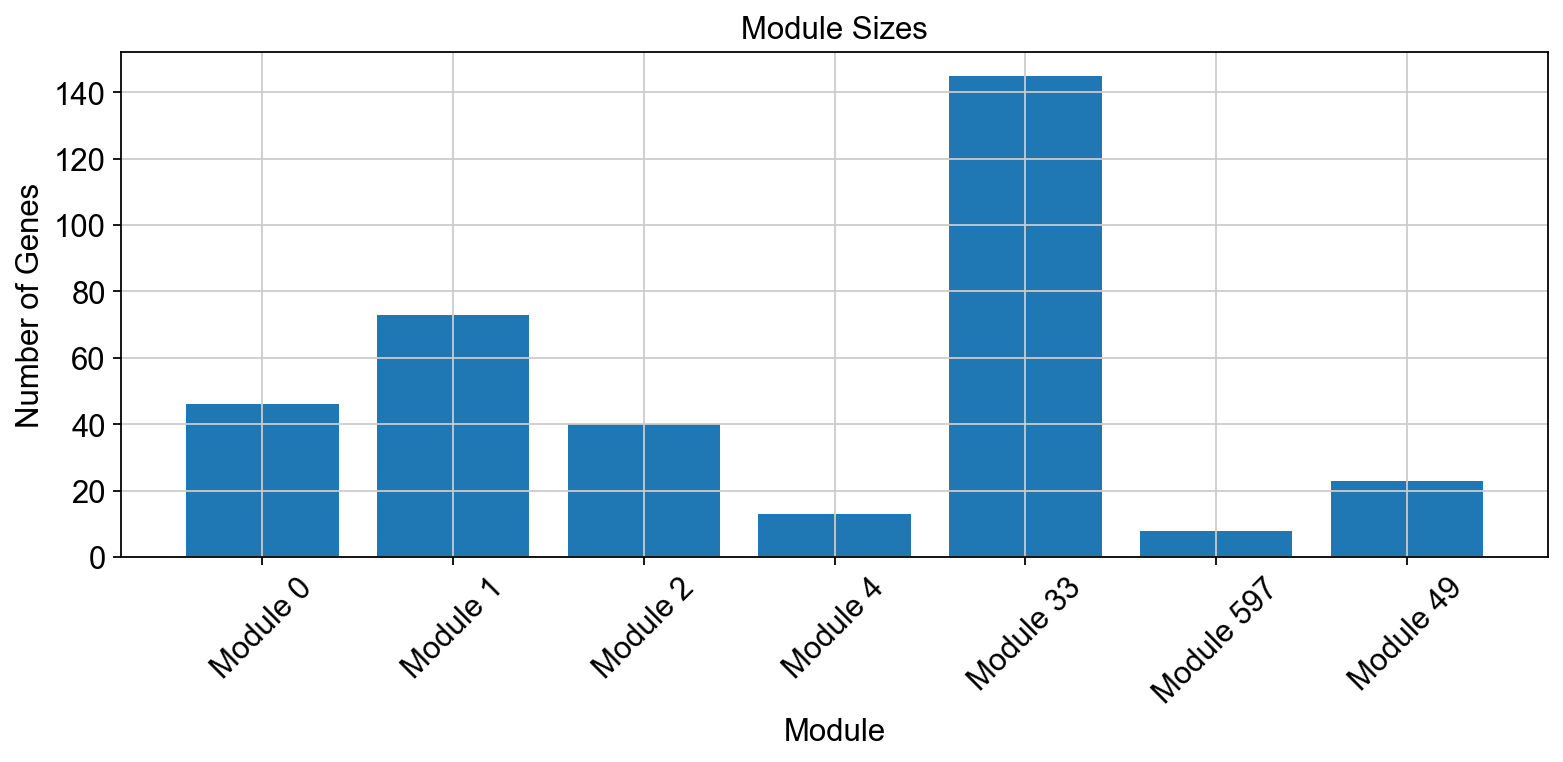

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# 绘制模块规模的柱状图
module_sizes = [len(genes) for genes in filtered_gene_groups.values()]
module_labels = [f"Module {community_id}" for community_id in filtered_gene_groups.keys()]

plt.figure(figsize=(10, 5))
plt.bar(module_labels, module_sizes)
plt.xlabel("Module")
plt.ylabel("Number of Genes")
plt.title("Module Sizes")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [56]:
# 假设你已经获取了基因名称 gene_names 和筛选后的基因分组 filtered_gene_groups

# 创建模块-基因矩阵，用于存储每个模块内基因的表达值
num_genes = len(gene_names)
num_modules = len(filtered_gene_groups)
module_gene_matrix = np.zeros((num_genes, num_modules))

# 假设你已经计算了 upregulated_gene_expression，它是一个包含上调基因表达数据的矩阵

for idx, (community_id, genes) in enumerate(filtered_gene_groups.items()):
    for gene in genes:
        gene_index = gene_names.index(gene)
        module_gene_matrix[gene_index, idx] = np.mean(upregulated_gene_expression[:, gene_index])

# 对模块内基因表达值进行标准化
module_gene_matrix_normalized = (module_gene_matrix - module_gene_matrix.mean(axis=0)) / module_gene_matrix.std(axis=0)

# 计算模块-模块相关系数矩阵（使用 Pearson 相关系数）
module_correlation_matrix = np.corrcoef(module_gene_matrix_normalized.T)

# 输出模块-模块相关系数矩阵
print("Module-Module Correlation Matrix:")
print(module_correlation_matrix)


Module-Module Correlation Matrix:
[[ 1.         -0.01562179 -0.01200875 -0.00810856 -0.01811729 -0.0046
  -0.00787207]
 [-0.01562179  1.         -0.0115138  -0.00777436 -0.01737058 -0.00441041
  -0.00754762]
 [-0.01200875 -0.0115138   1.         -0.00597629 -0.01335307 -0.00339036
  -0.00580199]
 [-0.00810856 -0.00777436 -0.00597629  1.         -0.00901627 -0.00228924
  -0.00391762]
 [-0.01811729 -0.01737058 -0.01335307 -0.00901627  1.         -0.00511495
  -0.00875332]
 [-0.0046     -0.00441041 -0.00339036 -0.00228924 -0.00511495  1.
  -0.00222248]
 [-0.00787207 -0.00754762 -0.00580199 -0.00391762 -0.00875332 -0.00222248
   1.        ]]


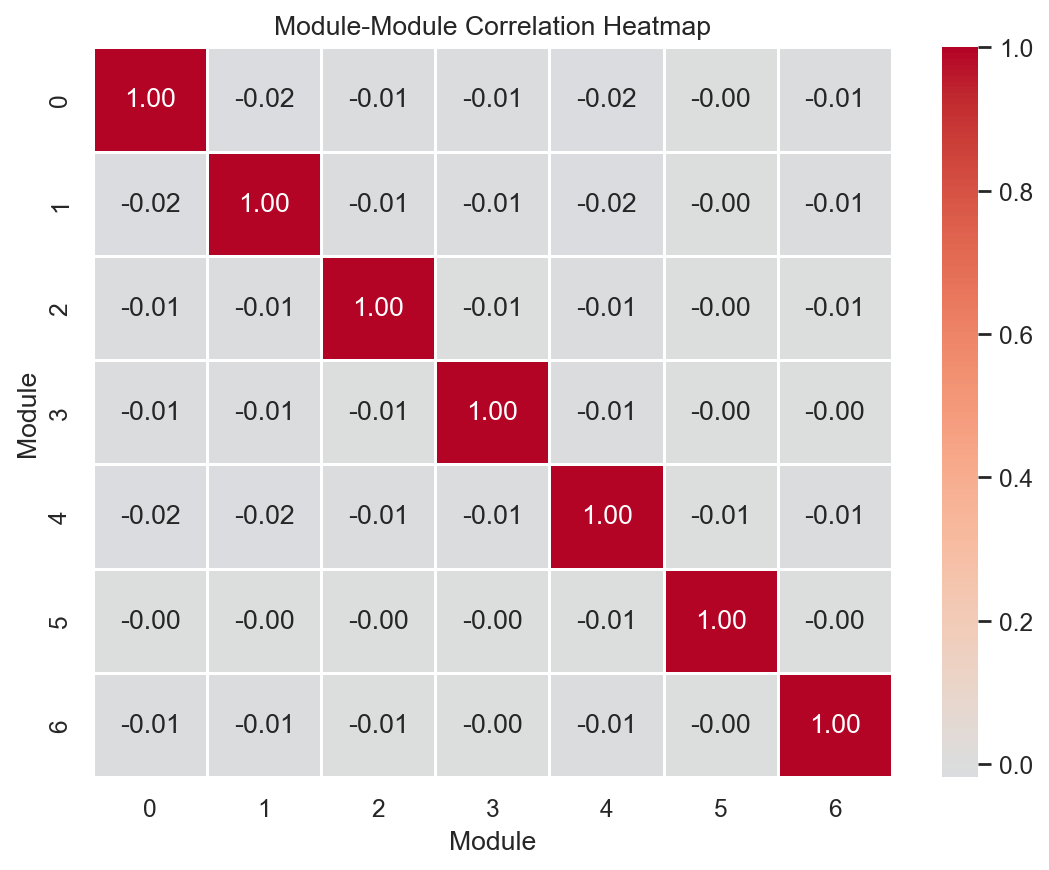

In [57]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn风格
sns.set(style="white")

# 绘制热图
plt.figure(figsize=(8, 6))
sns.heatmap(module_correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=.5)
plt.title("Module-Module Correlation Heatmap")
plt.xlabel("Module")
plt.ylabel("Module")
plt.show()


In [58]:
# 从过滤后的模块中提取基因列表
filtered_module_genes = list(filtered_gene_groups.values())

# 计算模块间的交集基因
module_intersection = {}
for i, genes1 in enumerate(filtered_module_genes):
    for j, genes2 in enumerate(filtered_module_genes):
        if i < j:  # 避免重复计算
            intersection = set(genes1) & set(genes2)
            module_intersection[(i, j)] = intersection

# 输出模块间的交集基因
for (module_id1, module_id2), intersection in module_intersection.items():
    print(f"Intersection between Module {module_id1} and Module {module_id2}: {len(intersection)} genes")


Intersection between Module 0 and Module 1: 0 genes
Intersection between Module 0 and Module 2: 0 genes
Intersection between Module 0 and Module 3: 0 genes
Intersection between Module 0 and Module 4: 0 genes
Intersection between Module 0 and Module 5: 0 genes
Intersection between Module 0 and Module 6: 0 genes
Intersection between Module 1 and Module 2: 0 genes
Intersection between Module 1 and Module 3: 0 genes
Intersection between Module 1 and Module 4: 0 genes
Intersection between Module 1 and Module 5: 0 genes
Intersection between Module 1 and Module 6: 0 genes
Intersection between Module 2 and Module 3: 0 genes
Intersection between Module 2 and Module 4: 0 genes
Intersection between Module 2 and Module 5: 0 genes
Intersection between Module 2 and Module 6: 0 genes
Intersection between Module 3 and Module 4: 0 genes
Intersection between Module 3 and Module 5: 0 genes
Intersection between Module 3 and Module 6: 0 genes
Intersection between Module 4 and Module 5: 0 genes
Intersection

In [59]:
# 获取 Community 1 的基因列表
selected_community_id = 1
selected_genes = filtered_gene_groups[selected_community_id]

# 从 AnnData 中提取选定基因的表达数据
selected_expression_data = adata[:, selected_genes].X


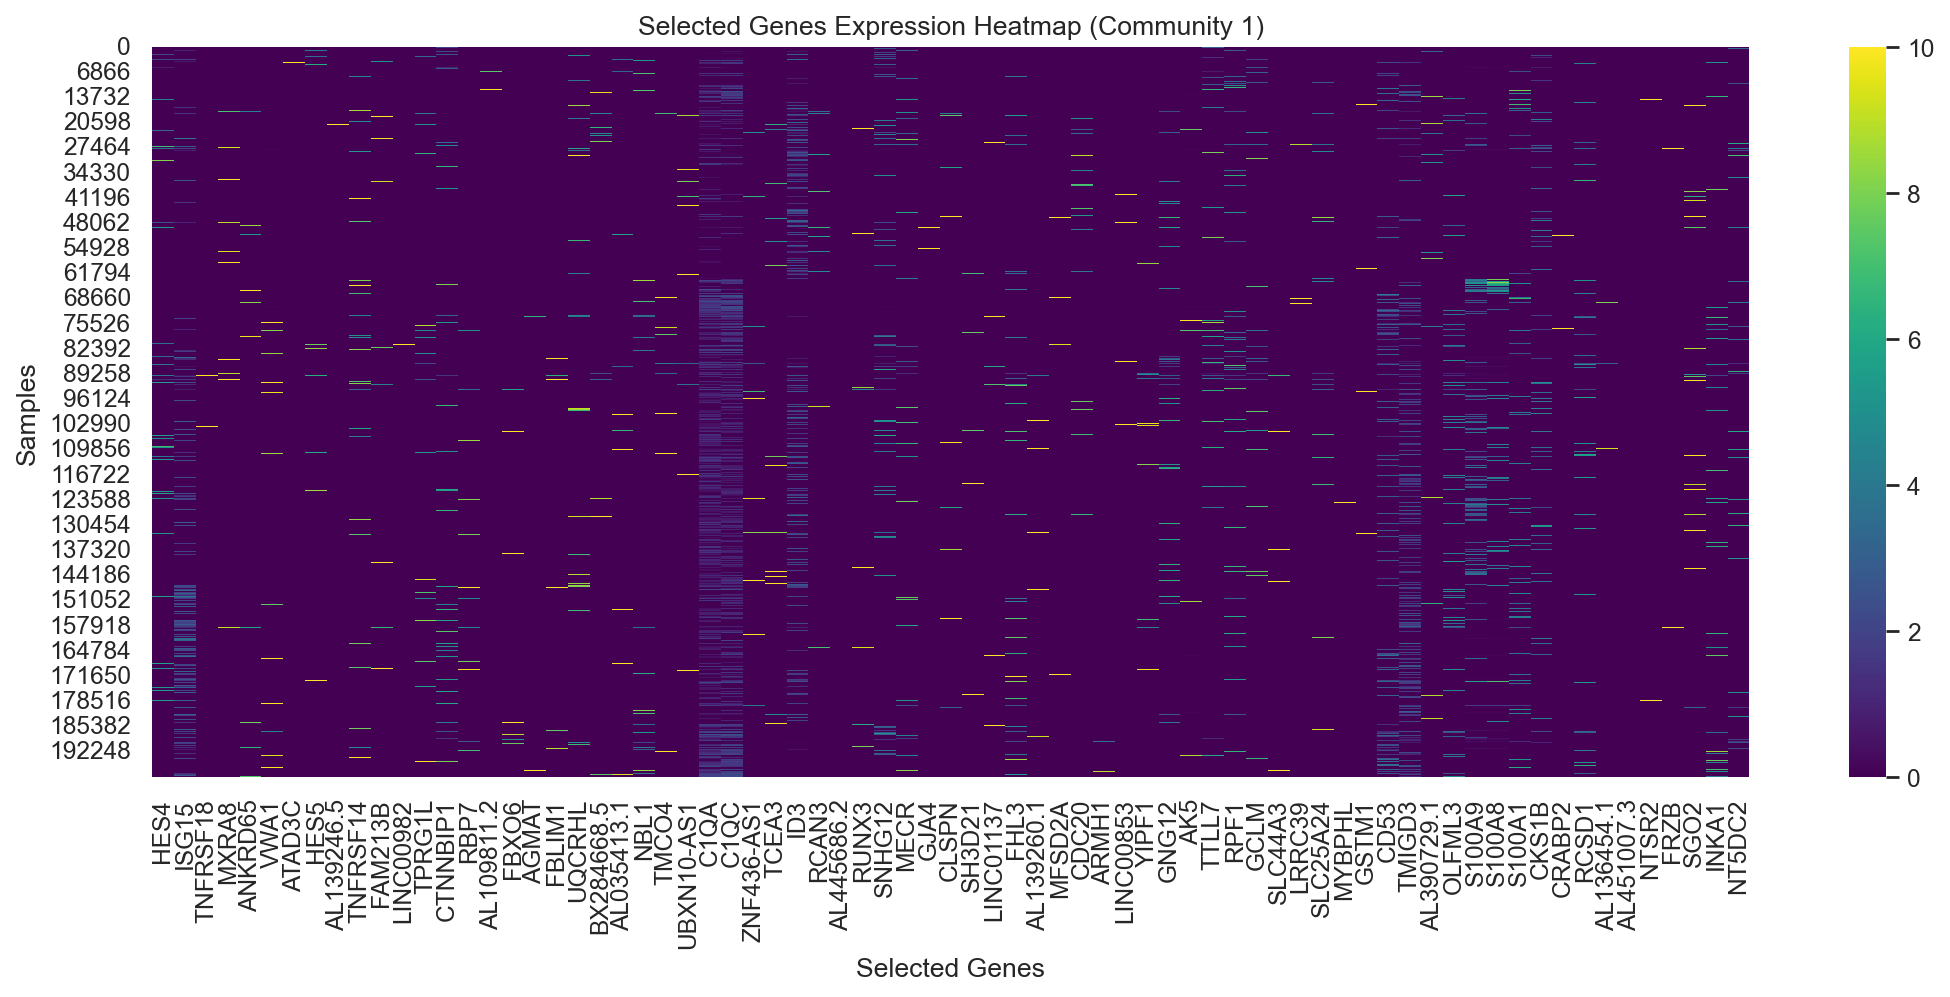

In [60]:
# 绘制基因表达热图
plt.figure(figsize=(16, 6))
ax = sns.heatmap(selected_expression_data, cmap='viridis', vmin=0, vmax=10)  # 调整 vmin 和 vmax 根据数据范围

# 添加基因名标签
ax.set_xticks(np.arange(len(selected_genes)) + 0.5)
ax.set_xticklabels(selected_genes, rotation=90)
plt.title('Selected Genes Expression Heatmap (Community 1)')
plt.xlabel('Selected Genes')
plt.ylabel('Samples')
plt.show()

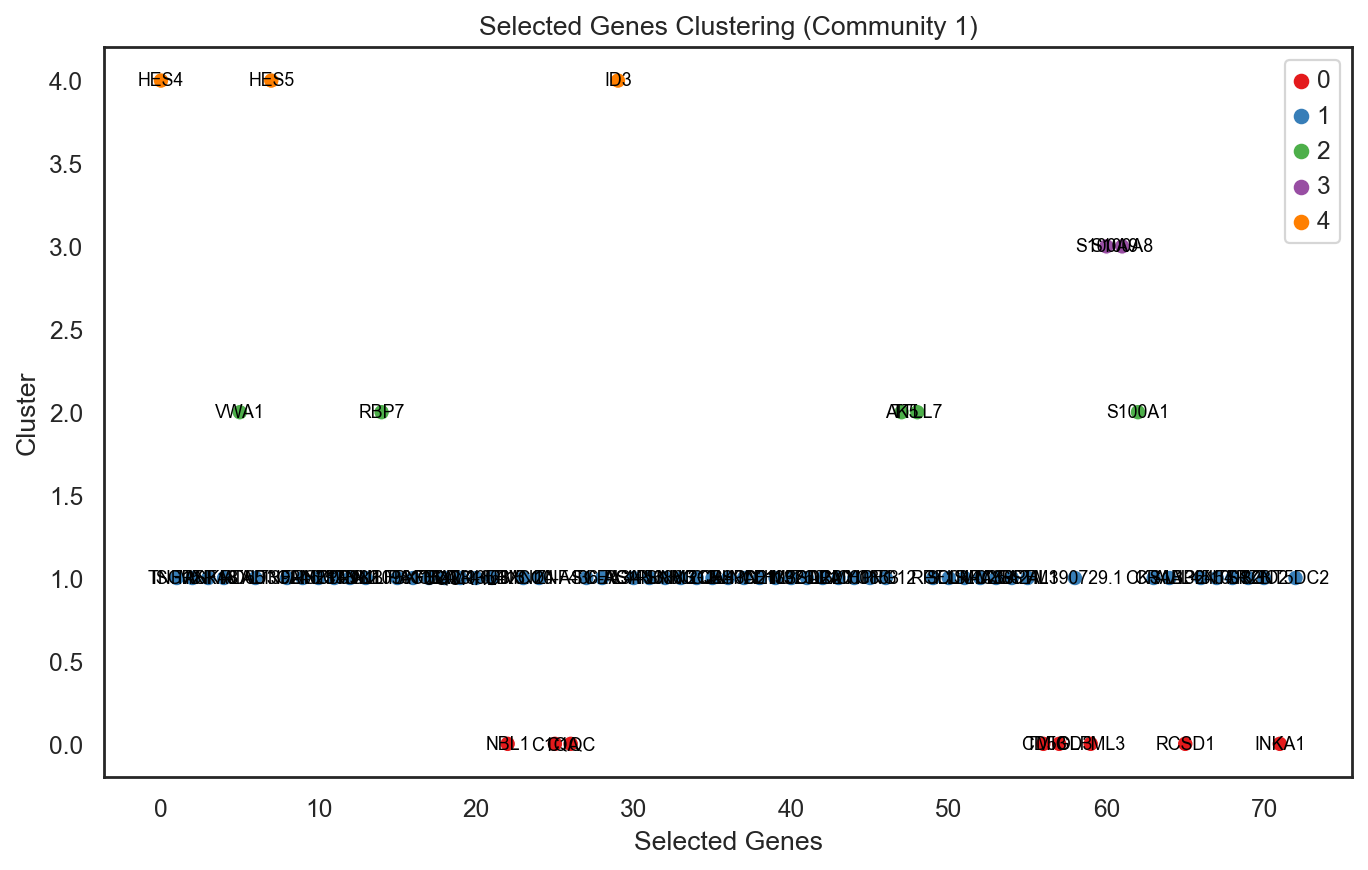

In [61]:
from sklearn.cluster import AgglomerativeClustering

# 使用层次聚类进行基因聚类
clustering = AgglomerativeClustering(n_clusters=5)  # 指定聚类的数量
gene_clusters = clustering.fit_predict(selected_expression_data.T)

# 绘制基因聚类图
plt.figure(figsize=(10, 6))
sns.scatterplot(x=np.arange(len(gene_clusters)), y=gene_clusters, hue=gene_clusters, palette='Set1', s=50)

# 添加基因名标签
for i, gene in enumerate(selected_genes):
    plt.text(i, gene_clusters[i], gene, fontsize=8, ha='center', va='center', color='black')

plt.title('Selected Genes Clustering (Community 1)')
plt.xlabel('Selected Genes')
plt.ylabel('Cluster')
plt.show()


In [62]:
import csv
output_file = "selected_genes.csv"  # 设置输出的CSV文件名

# 假设您的上调基因列表名为 upregulated_genes
upregulated_genes = adata.var_names.tolist()  # 假设adata.var_names包含了所有基因名

# 只选择前100个上调基因
selected_genes = upregulated_genes[:200]

# 将 selected_genes 保存到CSV文件
with open(output_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Selected Genes"])  # 写入CSV文件的表头
    writer.writerows([[gene] for gene in selected_genes])


<Axes: xlabel='logfoldchanges', ylabel='pvals_adj'>

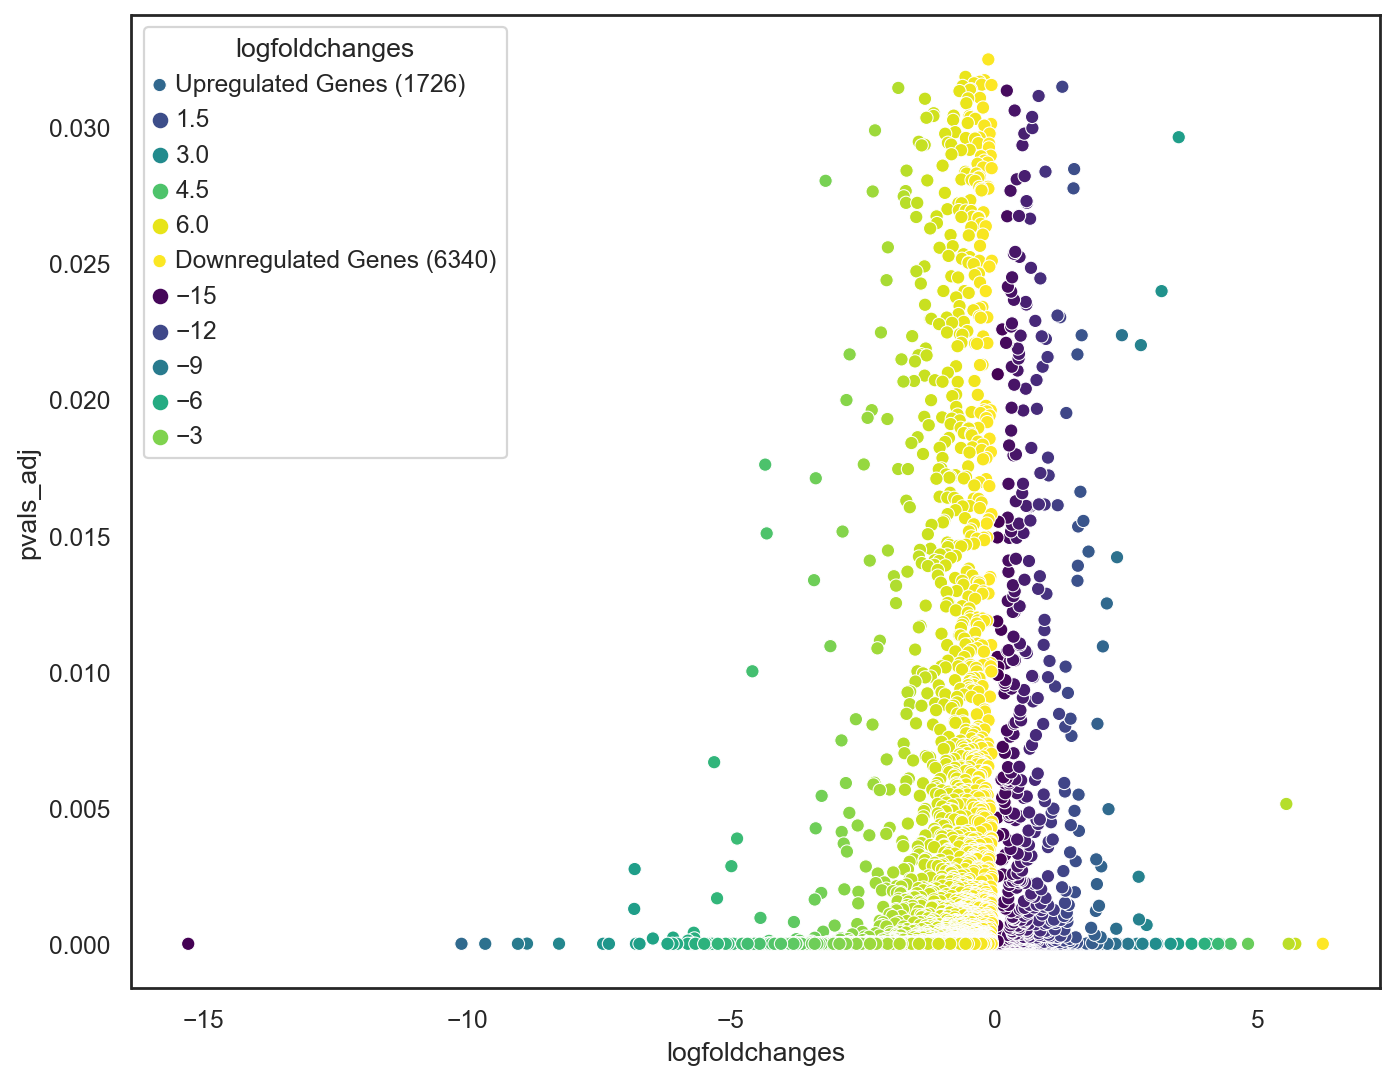

In [64]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x='logfoldchanges', y='pvals_adj', data=seizure_upregulated_genes, label=f'Upregulated Genes ({num_upregulated})', hue='logfoldchanges', palette='viridis')
sns.scatterplot(x='logfoldchanges', y='pvals_adj', data=seizure_downregulated_genes, label=f'Downregulated Genes ({num_downregulated})', hue='logfoldchanges', palette='viridis')
